In [35]:
%load_ext autoreload
%autoreload 2

from transformers import pipeline
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from PIL import Image
import numpy as np
import torch
from diffusers.utils import load_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


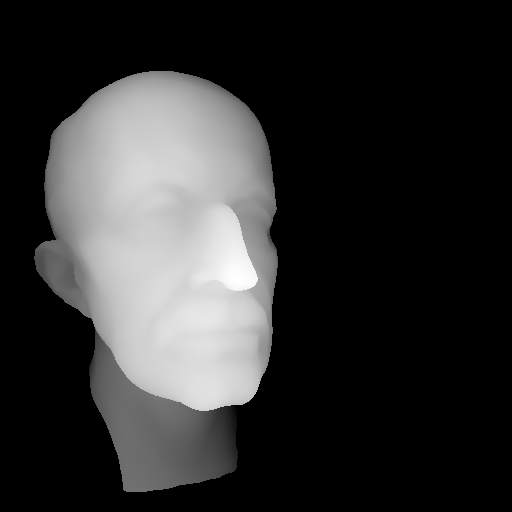

In [44]:
from einops import rearrange
from diffusion import process_depth_map
import torchvision.transforms as transforms

depth = torch.load('data/depth.pt')
depth = rearrange(depth, '1 h w c -> c h w')

# normalize depth
depth_map_normalized = process_depth_map(depth)

transform = transforms.Compose([
    transforms.ToPILImage()
])

depth_img = transform(depth_map_normalized)
depth_img

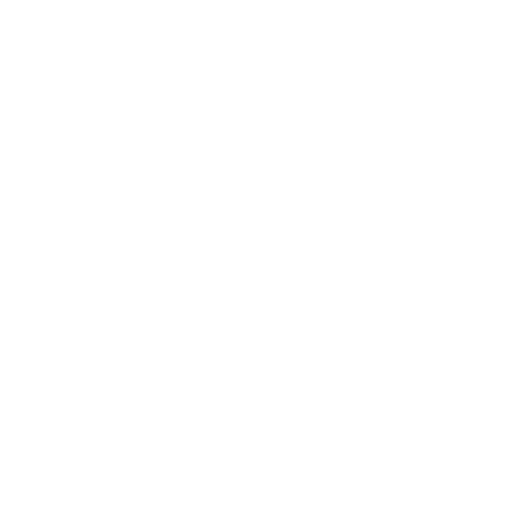

In [48]:
img = torch.load('data/render.pt')
img = rearrange(img, '1 h w c -> c h w')

base_img = transform(img)
base_img

In [38]:
from diffusion import depth2img_pipe, depth2img

pipe = depth2img_pipe()

Loading pipeline components...:  50%|█████     | 3/6 [00:00<00:00,  3.35it/s]/home/jorge/miniconda3/envs/thesis/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  6.25it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all publ

<PIL.Image.Image image mode=L size=512x512 at 0x7F63E44577F0>


100%|██████████| 20/20 [00:03<00:00,  5.75it/s]


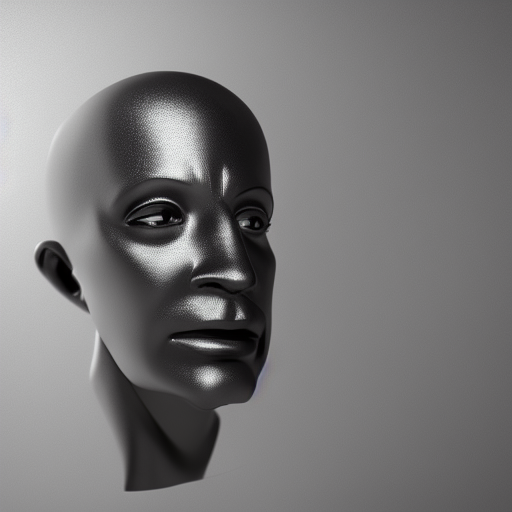

In [64]:
depth2img(pipe, '', depth_img)